In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('Test data 10 to 60 3 replicates.csv')
df.head()

,Unnamed: 0,Sample Number,Lubrication Condition,Pin Material,Weight (kg),RPM,wear0,wear1,wear2,friction0,friction1,friction2
0,0,1,No lubrication,Brass,5,175,119.647059,127.269412,134.637647,10.915294,10.852941,10.914706
1,1,2,No lubrication,Brass,8,225,76.274706,93.107647,109.484706,16.452353,16.540588,16.440000
2,2,3,No lubrication,Brass,11,300,277.797647,316.221176,351.211765,21.681765,21.783529,21.722941
3,3,4,Half Lubrication,Brass,5,175,67.973529,69.032941,70.001765,4.726471,4.904706,4.996471
4,4,5,Half Lubrication,Brass,8,225,104.989412,107.451765,109.815882,8.457647,8.617647,8.535882


In [111]:
df['Wear'] = (df['wear0'] + df['wear1'] + df['wear2'])/3
df['Friction'] = (df['friction0'] + df['friction1'] + df['friction2'])/3

In [112]:
df.head(18)

,Unnamed: 0,Sample Number,Lubrication Condition,Pin Material,Weight (kg),RPM,wear0,wear1,wear2,friction0,friction1,friction2,Wear,Friction
0,0,1,No lubrication,Brass,5,175,119.647059,127.269412,134.637647,10.915294,10.852941,10.914706,127.184706,10.894314
1,1,2,No lubrication,Brass,8,225,76.274706,93.107647,109.484706,16.452353,16.540588,16.440000,92.955686,16.477647
2,2,3,No lubrication,Brass,11,300,277.797647,316.221176,351.211765,21.681765,21.783529,21.722941,315.076863,21.729412
3,3,4,Half Lubrication,Brass,5,175,67.973529,69.032941,70.001765,4.726471,4.904706,4.996471,69.002745,4.875882
4,4,5,Half Lubrication,Brass,8,225,104.989412,107.451765,109.815882,8.457647,8.617647,8.535882,107.419020,8.537059
5,5,6,Half Lubrication,Brass,11,300,51.729412,56.648235,60.927647,11.766471,11.484118,11.368824,56.435098,11.539804
6,6,7,Full Lubrication,Brass,5,175,70.781176,72.098235,72.928235,4.656471,4.659412,4.600000,71.935882,4.638627
7,7,8,Full Lubrication,Brass,8,225,71.321765,74.003529,76.882353,7.984118,8.005294,8.014706,74.069216,8.001373
8,8,9,Full Lubrication,Brass,11,300,97.679412,104.207647,110.318824,11.264706,11.272941,11.262353,104.068627,11.266667
9,9,10,No lubrication,Aluminium,2,175,93.294118,95.134706,96.389412,2.078824,2.111765,2.260588,94.939412,2.150392


In [113]:
filtered_df = df[df['RPM'] == 175]
filtered_df['Weight (kg)']

0     5
3     5
6     5
9     2
12    2
15    2
Name: Weight (kg), dtype: int64

In [114]:
filtered_df[['Weight (kg)']]


,Weight (kg)
0,5
3,5
6,5
9,2
12,2
15,2


In [115]:
conditions = ['No lubrication', 'Half Lubrication', 'Full Lubrication']
materials = ['Brass', 'Aluminium']
properties = ['Friction', 'Wear']
weights = [5,8,11]
rpms = [175, 225, 300]

In [116]:
def plot_rpm_weight_vs_property(material, property):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    for lubrication in conditions:
        filtered_df = df[(df['Pin Material'] == material) & (df['Lubrication Condition'] == lubrication)]
        plt.plot(filtered_df['RPM'], filtered_df[property], label=lubrication)
    plt.xlabel('RPM')
    plt.ylabel(property)
    plt.title(f'{material}, RPM vs {property}')
    plt.legend()

    plt.subplot(1,2,2)
    for lubrication in conditions:
        filtered_df = df[(df['Pin Material'] == material) & (df['Lubrication Condition'] == lubrication)]
        plt.plot(filtered_df['Weight (kg)'], filtered_df[property], label=lubrication)
    plt.xlabel('Weight (kg)')
    # plt.ylabel(property)
    plt.title(f'{material}, Weight vs {property}')
    plt.legend()
    
    plt.show()

def plot_lubrication_vs_property(rpm, property):
    filtered_df = df[df['RPM'] == rpm]
    # weight = filtered_df['Weight (kg)'][0]
    sns.barplot(x='Pin Material', y=property, hue='Lubrication Condition', data=filtered_df)
    plt.ylabel(property)
    plt.title(f'{property} at {rpm} RPM')
    plt.legend()

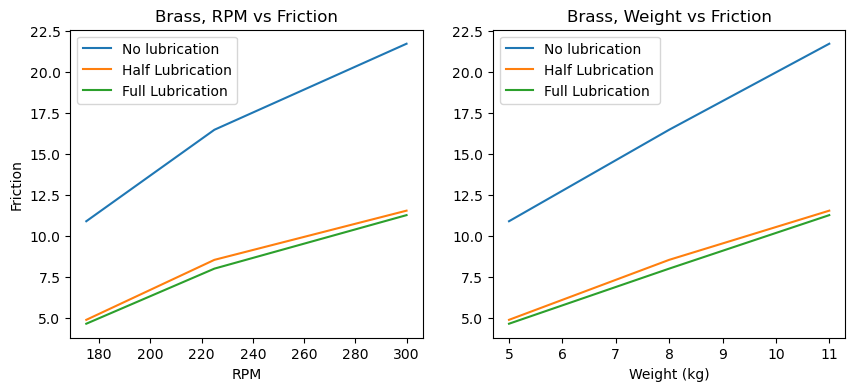

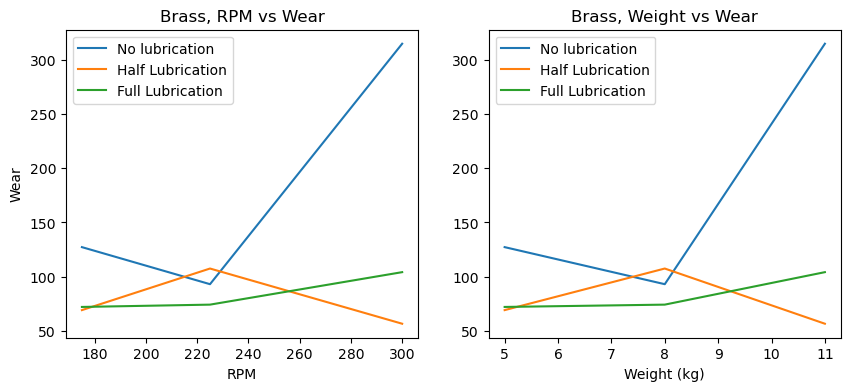

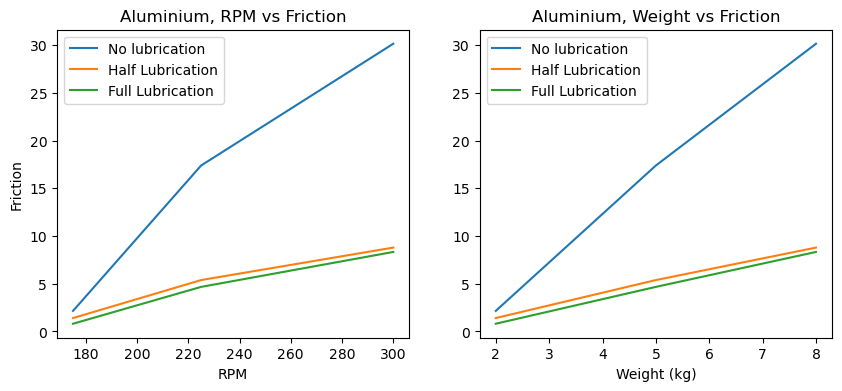

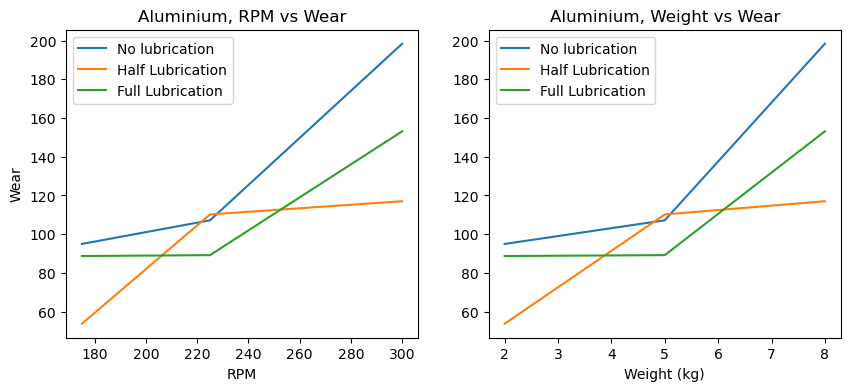

In [117]:
for m in materials:
    for p in properties:
        plot_rpm_weight_vs_property(m, p)

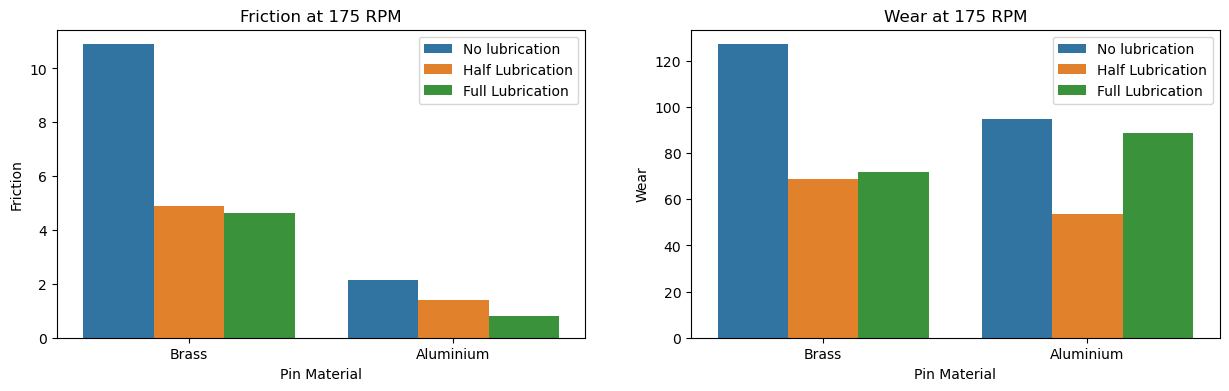

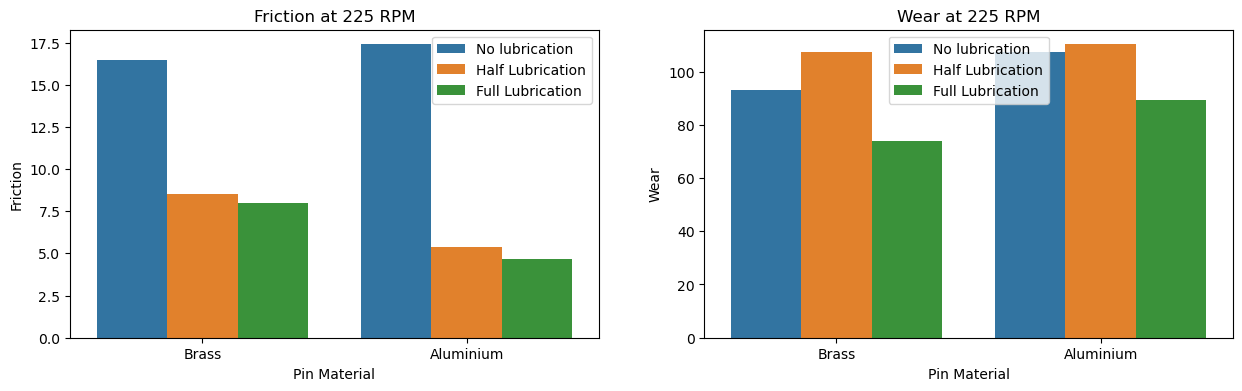

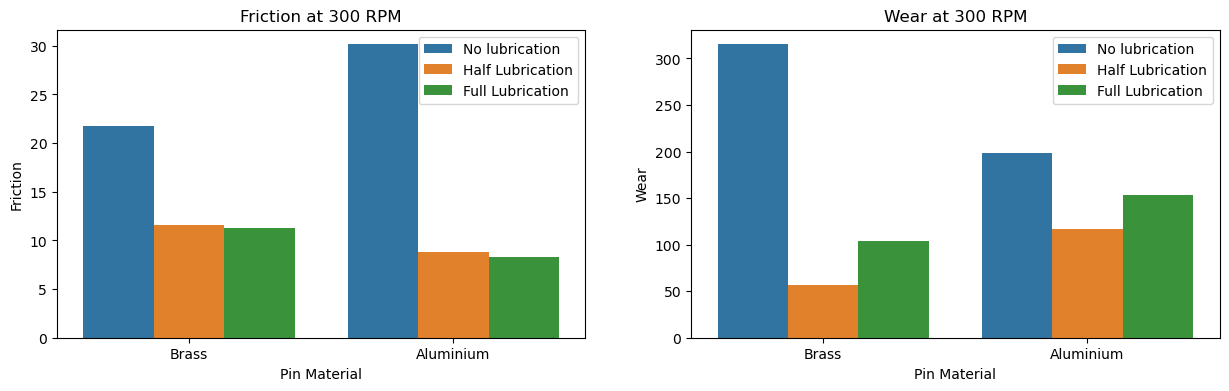

In [122]:
for r in rpms:
    plt.figure(figsize=(15,4))
    i = 121
    for p in properties:
        plt.subplot(i)
        plot_lubrication_vs_property(r, p)
        i = i + 1
    
    plt.show()

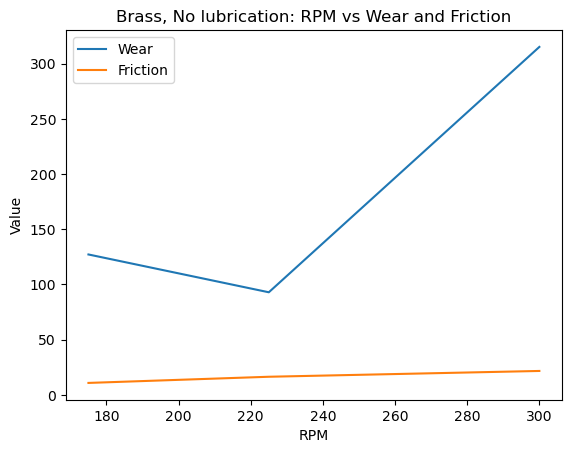

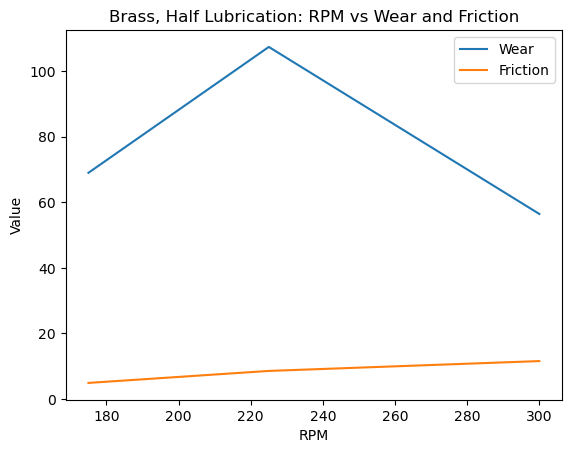

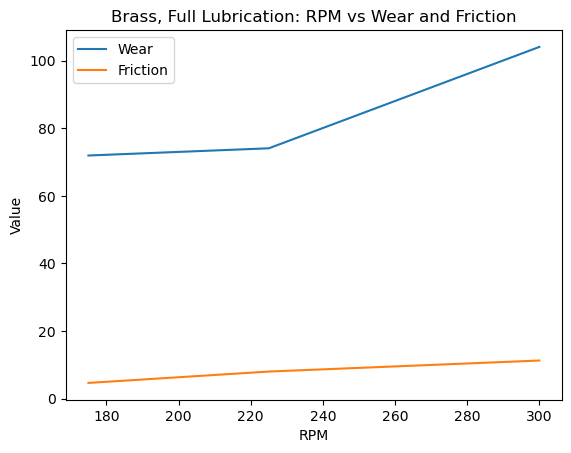

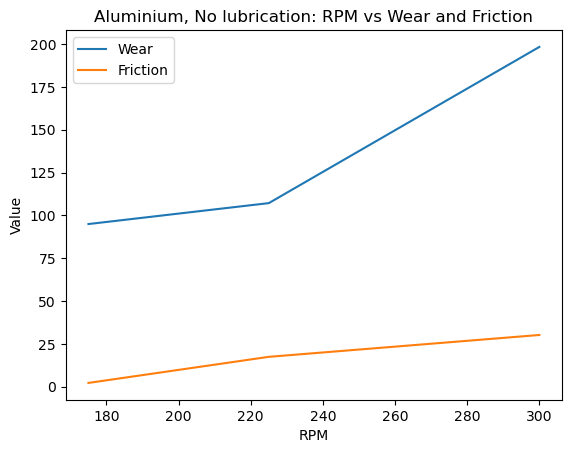

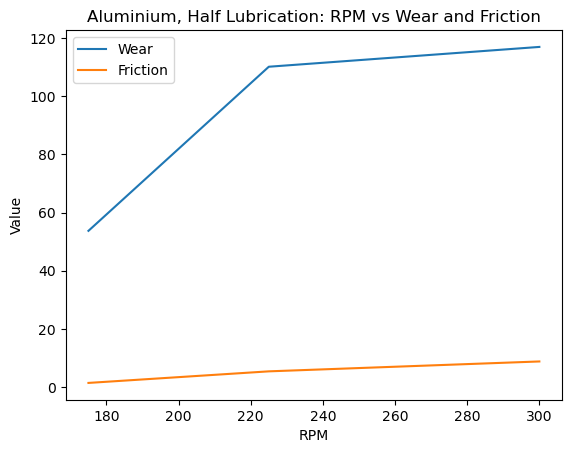

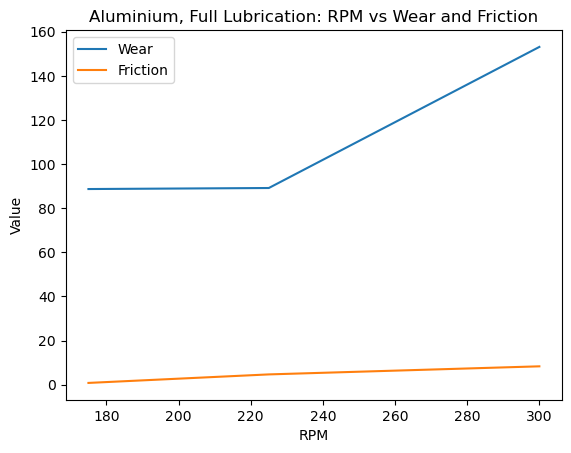

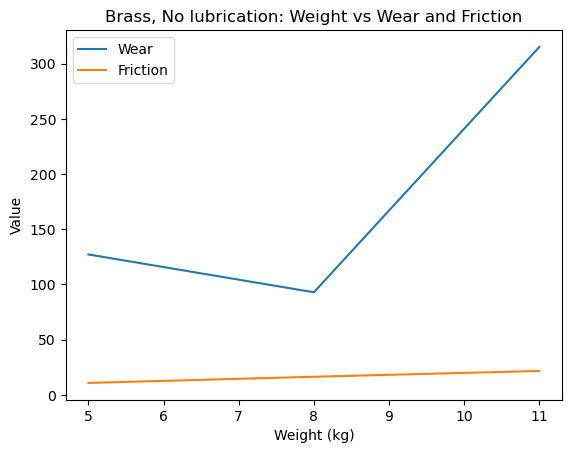

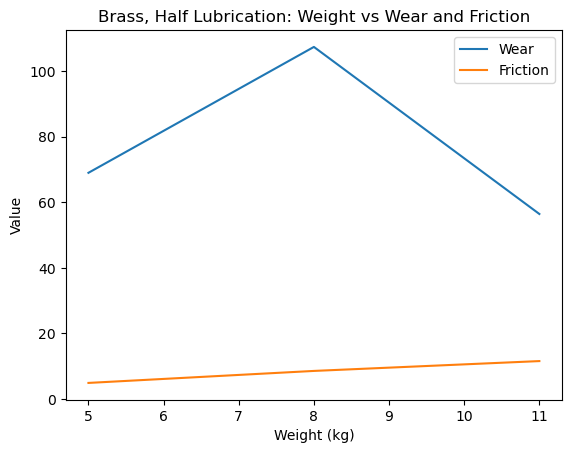

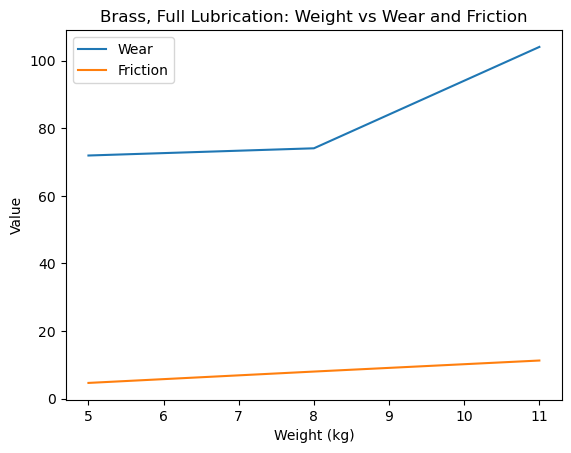

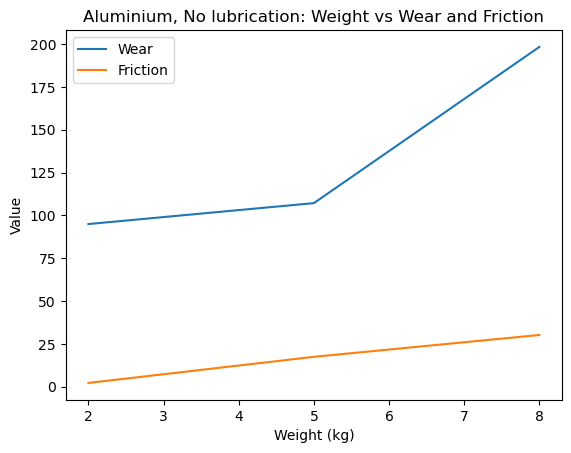

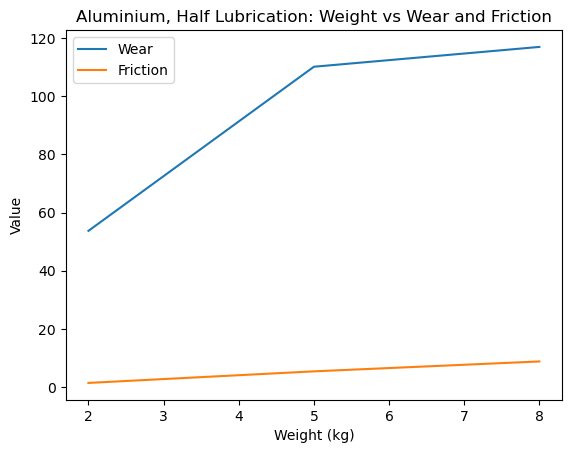

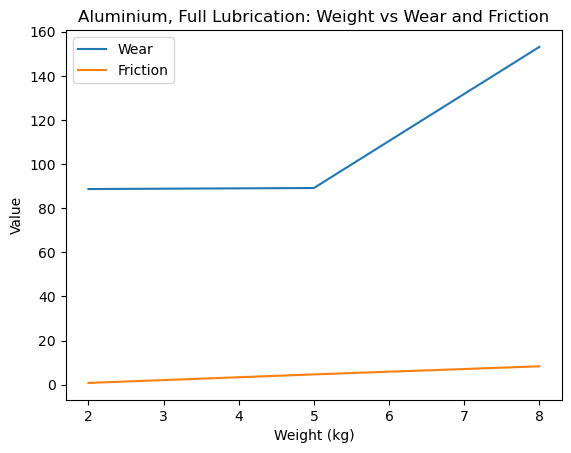

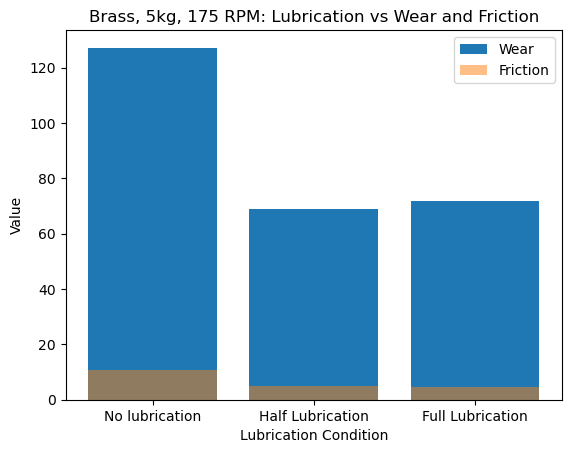

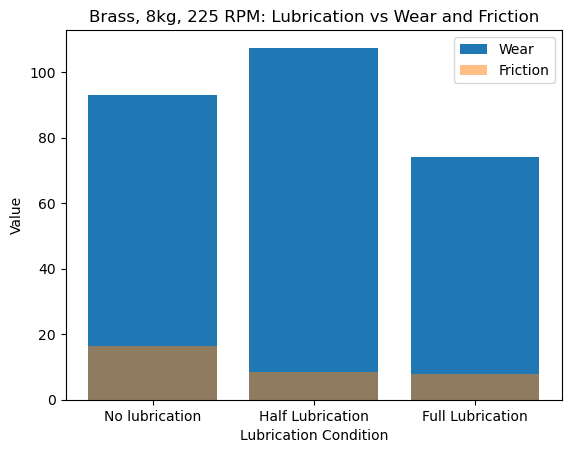

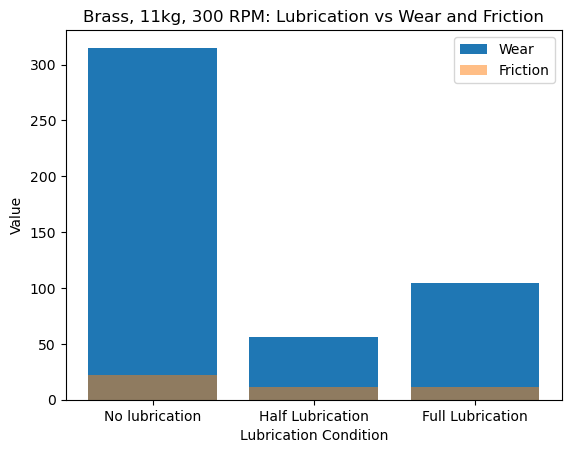

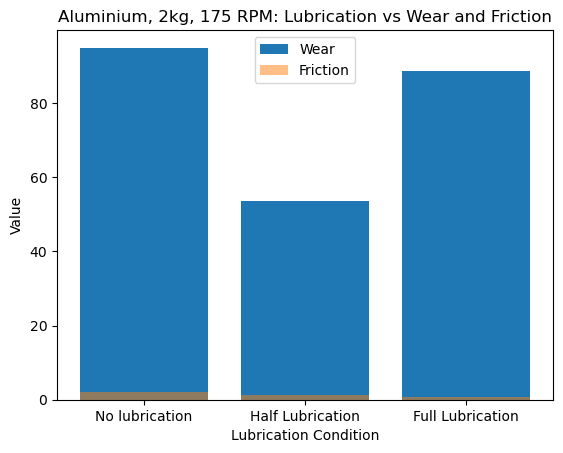

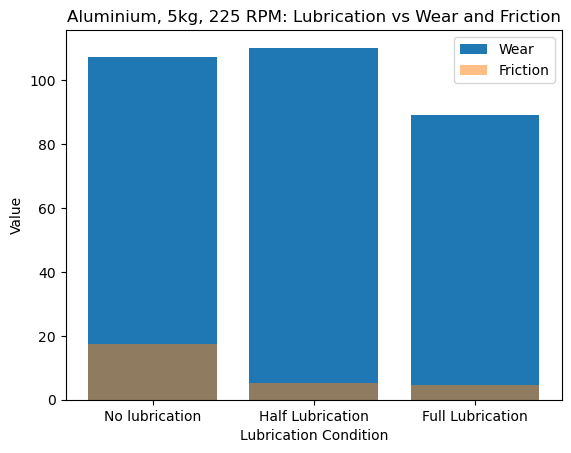

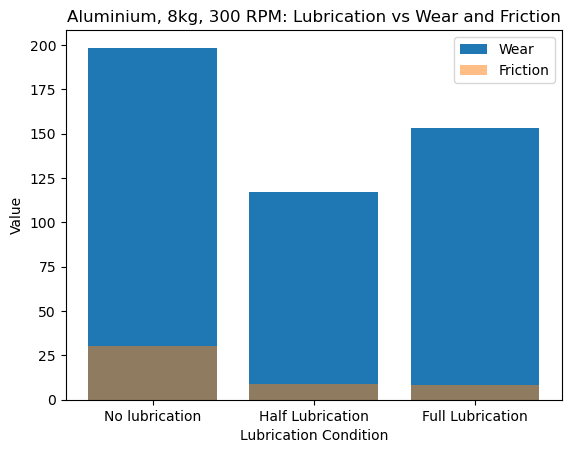

In [119]:
# Function to plot RPM vs wear and RPM vs friction
def plot_rpm_vs_wear_and_friction(material, lubrication):
    filtered_df = df[(df['Pin Material'] == material) & (df['Lubrication Condition'] == lubrication)]
    plt.plot(filtered_df['RPM'], filtered_df['Wear'], label='Wear')
    plt.plot(filtered_df['RPM'], filtered_df['Friction'], label='Friction')
    plt.xlabel('RPM')
    plt.ylabel('Value')
    plt.title(f'{material}, {lubrication}: RPM vs Wear and Friction')
    plt.legend()
    plt.show()

# Function to plot Weight vs wear and Weight vs friction
def plot_weight_vs_wear_and_friction(material, lubrication):
    filtered_df = df[(df['Pin Material'] == material) & (df['Lubrication Condition'] == lubrication)]
    plt.plot(filtered_df['Weight (kg)'], filtered_df['Wear'], label='Wear')
    plt.plot(filtered_df['Weight (kg)'], filtered_df['Friction'], label='Friction')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Value')
    plt.title(f'{material}, {lubrication}: Weight vs Wear and Friction')
    plt.legend()
    plt.show()

# Function to plot Lubrication Condition vs wear and Lubrication Condition vs friction
def plot_lubrication_vs_wear_and_friction(material, weight, rpm):
    filtered_df = df[(df['Pin Material'] == material) & (df['Weight (kg)'] == weight) & (df['RPM'] == rpm)]
    plt.bar(filtered_df['Lubrication Condition'], filtered_df['Wear'], label='Wear')
    plt.bar(filtered_df['Lubrication Condition'], filtered_df['Friction'], label='Friction', alpha=0.5)
    plt.xlabel('Lubrication Condition')
    plt.ylabel('Value')
    plt.title(f'{material}, {weight}kg, {rpm} RPM: Lubrication vs Wear and Friction')
    plt.legend()
    plt.show()

# Plotting graphs
plot_rpm_vs_wear_and_friction('Brass', 'No lubrication')
plot_rpm_vs_wear_and_friction('Brass', 'Half Lubrication')
plot_rpm_vs_wear_and_friction('Brass', 'Full Lubrication')

plot_rpm_vs_wear_and_friction('Aluminium', 'No lubrication')
plot_rpm_vs_wear_and_friction('Aluminium', 'Half Lubrication')
plot_rpm_vs_wear_and_friction('Aluminium', 'Full Lubrication')

plot_weight_vs_wear_and_friction('Brass', 'No lubrication')
plot_weight_vs_wear_and_friction('Brass', 'Half Lubrication')
plot_weight_vs_wear_and_friction('Brass', 'Full Lubrication')

plot_weight_vs_wear_and_friction('Aluminium', 'No lubrication')
plot_weight_vs_wear_and_friction('Aluminium', 'Half Lubrication')
plot_weight_vs_wear_and_friction('Aluminium', 'Full Lubrication')


plot_lubrication_vs_wear_and_friction('Brass', 5, 175)
plot_lubrication_vs_wear_and_friction('Brass', 8, 225)
plot_lubrication_vs_wear_and_friction('Brass', 11, 300)

plot_lubrication_vs_wear_and_friction('Aluminium', 2, 175)
plot_lubrication_vs_wear_and_friction('Aluminium', 5, 225)
plot_lubrication_vs_wear_and_friction('Aluminium', 8, 300)

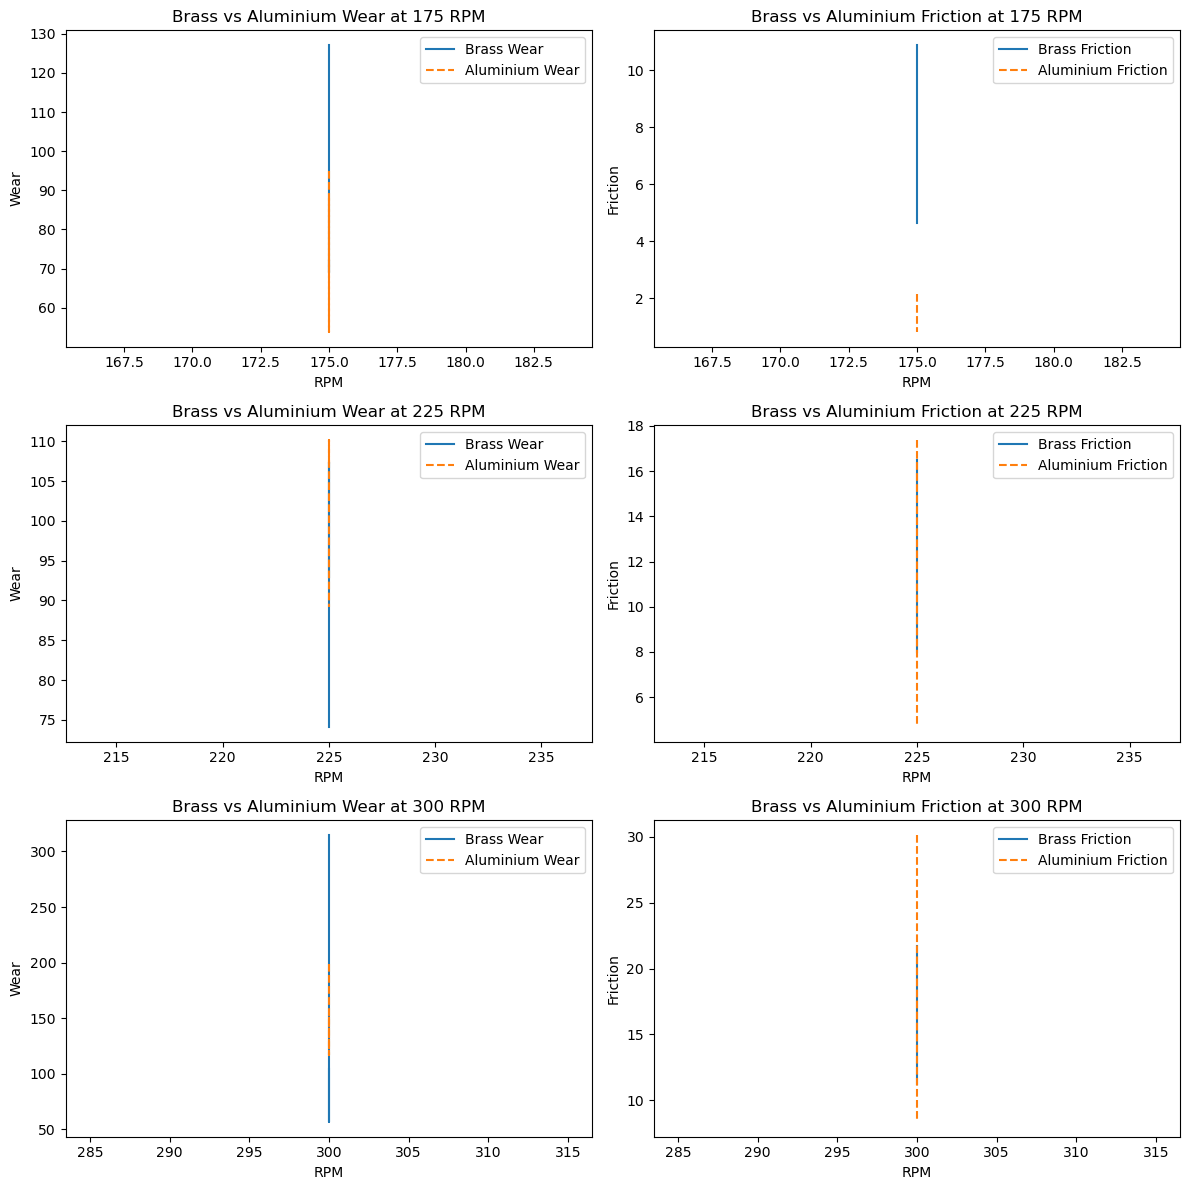

In [120]:
def plot_rpm_vs_wear_and_friction(material1, material2):
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))
    rpms = sorted(df['RPM'].unique())

    for i, rpm in enumerate(rpms):
        filtered_df_material1 = df[(df['Pin Material'] == material1) & (df['RPM'] == rpm)]
        filtered_df_material2 = df[(df['Pin Material'] == material2) & (df['RPM'] == rpm)]

        ax = axs[i]
        ax[0].plot(filtered_df_material1['RPM'], filtered_df_material1['Wear'], label=f'{material1} Wear')
        ax[0].plot(filtered_df_material2['RPM'], filtered_df_material2['Wear'], label=f'{material2} Wear', linestyle='--')
        ax[0].set_xlabel('RPM')
        ax[0].set_ylabel('Wear')
        ax[0].set_title(f'{material1} vs {material2} Wear at {rpm} RPM')
        ax[0].legend()

        ax[1].plot(filtered_df_material1['RPM'], filtered_df_material1['Friction'], label=f'{material1} Friction')
        ax[1].plot(filtered_df_material2['RPM'], filtered_df_material2['Friction'], label=f'{material2} Friction', linestyle='--')
        ax[1].set_xlabel('RPM')
        ax[1].set_ylabel('Friction')
        ax[1].set_title(f'{material1} vs {material2} Friction at {rpm} RPM')
        ax[1].legend()

    plt.tight_layout()
    plt.show()

# Plotting graphs
plot_rpm_vs_wear_and_friction('Brass', 'Aluminium')